## Calibration of lab probes B, C and P

Probes B and C will be fixed under the canyons to measure conductivity at the heads of the canyons replacing A and K.
Probe P witll be used in the profiler.

We used a maximum salinity of (200 g salt/ 4 l water) which is a density of 1.032344 g/cm^3. 

CH1 - B

CH2 - C

CH3 - P


File variables:

|variable name| type and shape|
|::|::|
|'ch1':| float, array(nsamples)|
|'ch2': |float, array(nsamples)|
|'ch3': |float, array(nsamples)|
|'ch4': |float, array(nsamples)|
|'dt': |float, scalar|
|'macORpc': |str ('mac')|
|'nSample': |float, scalar|
|'nSamples': |float, scalar|
|'portNumber':| int, scalar|
|'pp':| float, array, not sure what it has|
|'time':| float, array(nsamples)|
|'timeElapsed':| float,scalar|

In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
df = pd.read_csv('../probesBCP_20feb19/calibration.csv',header=2)
print(df)


    salty  tap  percentage   density  temperature
0     200    0         100  1.032344       19.997
1     200    0          99  1.031260       19.997
2     180   20          91  1.027800       20.000
3     180   20          90  1.027845       20.000
4     160   40          80  1.024263       20.000
5     160   40          79  1.023260       19.999
6     140   60          70  1.021943       19.999
7     140   60          69  1.021500       19.999
8     120   80          60  1.018425       19.992
9     100  100          50  1.014883       19.998
10     80  120          40  1.011800       19.994
11     60  140          30  1.008548       19.999
12     40  160          20  1.005810       19.997
13     20  180          10  1.001470       19.996
14      0  200           0  0.998090       19.998


../probesBCP_20feb19/100pc.mat
../probesBCP_20feb19/099pc.mat
../probesBCP_20feb19/091pc.mat
../probesBCP_20feb19/090pc.mat
../probesBCP_20feb19/080pc.mat
../probesBCP_20feb19/079pc.mat
../probesBCP_20feb19/070pc.mat
../probesBCP_20feb19/069pc.mat
../probesBCP_20feb19/060pc.mat
../probesBCP_20feb19/050pc.mat
../probesBCP_20feb19/040pc.mat
../probesBCP_20feb19/030pc.mat
../probesBCP_20feb19/020pc.mat
../probesBCP_20feb19/010pc.mat
../probesBCP_20feb19/000pc.mat


Text(0.5,1,'CH3 - probe P ')

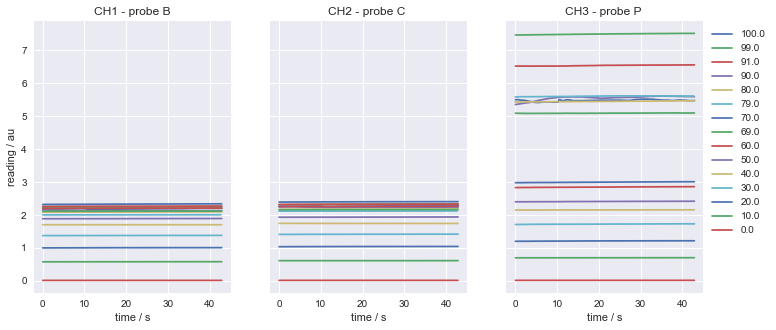

In [4]:
file_num = 15

mean_read_ch1 = np.zeros(file_num)
std_read_ch1 = np.zeros(file_num)

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

mean_read_ch3 = np.zeros(file_num)
std_read_ch3 = np.zeros(file_num)

nums = ['100','099','091','090','080','079','070','069','060','050','040','030','020','010','000']
 
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)

for num, ii in zip(nums, range(file_num)):
    filepath = '../probesBCP_20feb19/%spc.mat' %num
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    ch3 = mat['ch3']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1[ii] = np.mean(ch1)
    std_read_ch1[ii] = np.std(ch1)
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
    
    mean_read_ch3[ii] = np.mean(ch3)
    std_read_ch3[ii] = np.std(ch3)
    
    ax0.plot(time,ch1)
    ax1.plot(time,ch2)
    ax2.plot(time,ch3, label='%1.1f' %df.percentage[ii])
    
ax2.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax2.set_xlabel('time / s')
ax0.set_title('CH1 - probe B')
ax1.set_title('CH2 - probe C ')
ax2.set_title('CH3 - probe P ')

Probe B
rho_B = 0.998015+0.005719r+0.000886r^2+0.000488r^3 

Probe C
rho_C = 0.998043+0.004715r+0.001847r^2+0.000171r^3 

Probe P
rho_P = 0.998465+0.001325r+0.003925r^2+-0.000648r^3


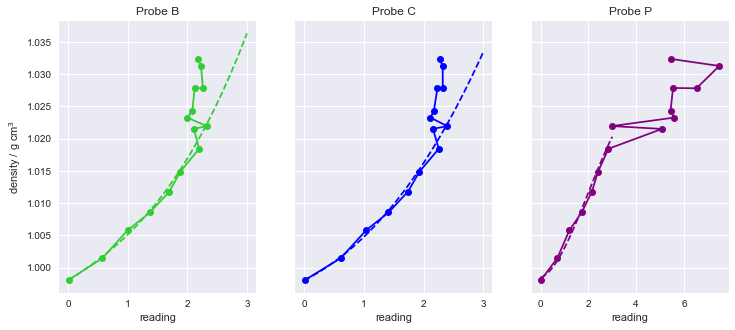

In [5]:
coefB, statsB = P.polyfit(mean_read_ch1[6:],np.array(df.density)[6:],3,full=True)
coefC, statsC = P.polyfit(mean_read_ch2[6:],np.array(df.density)[6:],3,full=True)
coefP, statsP = P.polyfit(mean_read_ch3[6:],np.array(df.density)[6:],3,full=True)

read_dummy = np.linspace(0,3,30)
fitB = coefB[0]+(coefB[1]*read_dummy)+(coefB[2]*read_dummy**2) + (coefB[3]*read_dummy**3)
fitC = coefC[0]+(coefC[1]*read_dummy)+(coefC[2]*read_dummy**2) + (coefC[3]*read_dummy**3)
fitP = coefP[0]+(coefP[1]*read_dummy)+(coefP[2]*read_dummy**2) + (coefP[3]*read_dummy**3)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)

ax0.errorbar(mean_read_ch1,df.density, xerr=std_read_ch1, marker='o', color='limegreen')
ax0.plot(read_dummy, fitB, '--',color='limegreen')

ax1.errorbar(mean_read_ch2,df.density, xerr=std_read_ch2, marker='o', color='blue')
ax1.plot(read_dummy, fitC, '--',color='blue')

ax2.errorbar(mean_read_ch3,df.density, xerr=std_read_ch3, marker='o', color='purple')
ax2.plot(read_dummy, fitP,'--', color='purple')

ax0.set_xlabel('reading')
ax0.set_ylabel('density / g cm$^3$')
ax1.set_xlabel('reading')
ax2.set_xlabel('reading')
ax0.set_title('Probe B')
ax1.set_title('Probe C')
ax2.set_title('Probe P')

print('Probe B')
print('rho_B = %f+%fr+%fr^2+%fr^3 \n' %(coefB[0], coefB[1], coefB[2], coefB[3]))

print('Probe C')
print('rho_C = %f+%fr+%fr^2+%fr^3 \n' %(coefC[0], coefC[1], coefC[2], coefC[3]))

print('Probe P')
print('rho_P = %f+%fr+%fr^2+%fr^3' %(coefP[0], coefP[1], coefP[2], coefP[3]))

### Ashu's Calibration 21-feb-19

    salt  water   density
0    200      0  1.032600
1    180     20  1.028510
2    160     40  1.025620
3    140     60  1.022330
4    120     80  1.018823
5    100    100  1.015332
6     80    120  1.012166
7     60    140  1.008790
8     40    160  1.005157
9     20    180  1.002050
10     0    200  0.998400
../probesBCP_20feb19/d100.mat
../probesBCP_20feb19/d90.mat
../probesBCP_20feb19/d80.mat
../probesBCP_20feb19/d70.mat
../probesBCP_20feb19/d60.mat
../probesBCP_20feb19/d50.mat
../probesBCP_20feb19/d40.mat
../probesBCP_20feb19/d30.mat
../probesBCP_20feb19/d20.mat
../probesBCP_20feb19/d10.mat
../probesBCP_20feb19/d00.mat
Probe B
rho_B = 0.998319+0.007060r+0.000101r^2+0.001103r^3 

Probe C
rho_C = 0.998383+0.004494r+0.000628r^2+0.000591r^3 

Probe P
rho_P = 0.998397+0.004542r+0.000282r^2+0.000347r^3


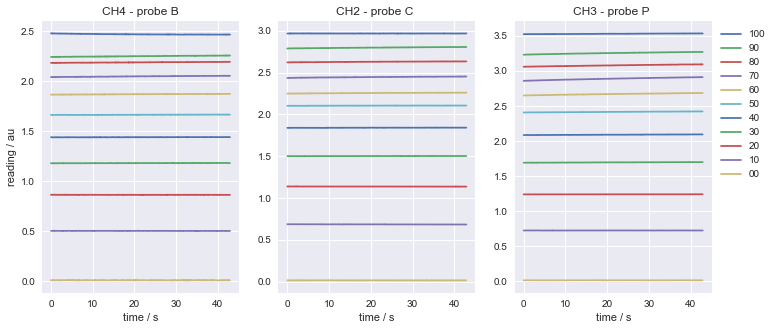

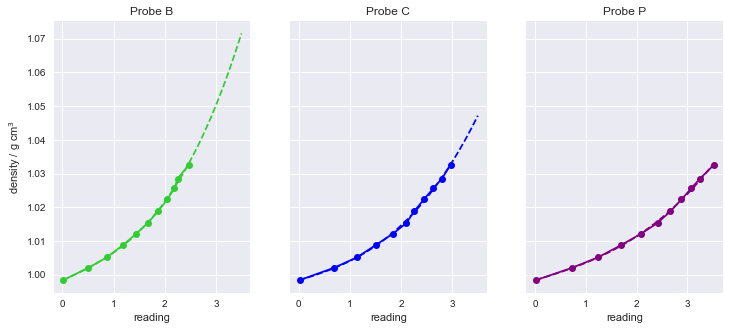

In [12]:
df = pd.read_csv('../probesBCP_20feb19/21FebCalibration_d.csv',header=0)
print(df)

file_num = 11

mean_read_ch4 = np.zeros(file_num)
std_read_ch4 = np.zeros(file_num)

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

mean_read_ch3 = np.zeros(file_num)
std_read_ch3 = np.zeros(file_num)

nums = ['100','90','80','70','60','50','40','30','20','10','00']
 
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5))

for num, ii in zip(nums, range(file_num)):
    filepath = '../probesBCP_20feb19/d%s.mat' %num
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch4 = mat['ch4']
    ch2 = mat['ch2']
    ch3 = mat['ch3']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch4[ii] = np.mean(ch4)
    std_read_ch4[ii] = np.std(ch4)
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
    
    mean_read_ch3[ii] = np.mean(ch3)
    std_read_ch3[ii] = np.std(ch3)
    
    ax0.plot(time,ch4)
    ax1.plot(time,ch2)
    ax2.plot(time,ch3, label='%s' %num)
    
ax2.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax2.set_xlabel('time / s')
ax0.set_title('CH4 - probe B')
ax1.set_title('CH2 - probe C ')
ax2.set_title('CH3 - probe P ')

coefB, statsB = P.polyfit(mean_read_ch4[:],np.array(df.density)[:],3,full=True)
coefC, statsC = P.polyfit(mean_read_ch2[:],np.array(df.density)[:],3,full=True)
coefP, statsP = P.polyfit(mean_read_ch3[:],np.array(df.density)[:],3,full=True)

read_dummy = np.linspace(0,3.5,30)

fitB = coefB[0]+(coefB[1]*read_dummy)+(coefB[2]*read_dummy**2) + (coefB[3]*read_dummy**3)
fitC = coefC[0]+(coefC[1]*read_dummy)+(coefC[2]*read_dummy**2) + (coefC[3]*read_dummy**3)
fitP = coefP[0]+(coefP[1]*read_dummy)+(coefP[2]*read_dummy**2) + (coefP[3]*read_dummy**3)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)

ax0.errorbar(mean_read_ch4,np.array(df.density)[:], xerr=std_read_ch4, marker='o', color='limegreen')
ax0.plot(read_dummy, fitB, '--',color='limegreen')

ax1.errorbar(mean_read_ch2,np.array(df.density)[:], xerr=std_read_ch2, marker='o', color='blue')
ax1.plot(read_dummy, fitC, '--',color='blue')

ax2.errorbar(mean_read_ch3,np.array(df.density)[:], xerr=std_read_ch3, marker='o', color='purple')
ax2.plot(read_dummy, fitP,'--', color='purple')

ax0.set_xlabel('reading')
ax0.set_ylabel('density / g cm$^3$')
ax1.set_xlabel('reading')
ax2.set_xlabel('reading')
ax0.set_title('Probe B')
ax1.set_title('Probe C')
ax2.set_title('Probe P')

print('Probe B')
print('rho_B = %f+%fr+%fr^2+%fr^3 \n' %(coefB[0], coefB[1], coefB[2], coefB[3]))

print('Probe C')
print('rho_C = %f+%fr+%fr^2+%fr^3 \n' %(coefC[0], coefC[1], coefC[2], coefC[3]))

print('Probe P')
print('rho_P = %f+%fr+%fr^2+%fr^3' %(coefP[0], coefP[1], coefP[2], coefP[3]))

#### test calibration

In [13]:
def densB(read_dummy):
    fitB = coefB[0]+(coefB[1]*read_dummy)+(coefB[2]*read_dummy**2) + (coefB[3]*read_dummy**3)
    return(fitB)
def densC(read_dummy):
    fitC = coefC[0]+(coefC[1]*read_dummy)+(coefC[2]*read_dummy**2) + (coefC[3]*read_dummy**3)
    return(fitC)
def densP(read_dummy):
    fitP = coefP[0]+(coefP[1]*read_dummy)+(coefP[2]*read_dummy**2) + (coefP[3]*read_dummy**3)
    return(fitP)

../probesBCP_20feb19/b100.mat
../probesBCP_20feb19/b50.mat
../probesBCP_20feb19/b00.mat


Text(0.5,1,'Probe P')

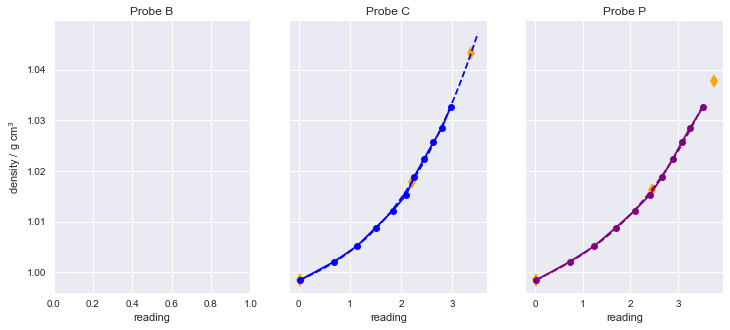

In [14]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)
nums = ['b100', 'b50', 'b00']
rhos = ['1.03265','1.01586','0.99745']

for num, rho in zip(nums, rhos):
    filepath = '../probesBCP_20feb19/%s.mat' %num
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    rC = mat['ch1']
    rP = mat['ch3']
    time = mat['time']
    nsamples = mat['nSamples']

    ax1.plot(np.mean(rC), densC(np.mean(rC)), '-d',markersize=10,color='orange')
    ax2.plot(np.mean(rP), densP(np.mean(rP)), '-d',markersize=10,color='orange')

ax1.errorbar(mean_read_ch2,np.array(df.density)[:], xerr=std_read_ch2, marker='o', color='blue')
ax1.plot(read_dummy, fitC, '--',color='blue')

ax2.errorbar(mean_read_ch3,np.array(df.density)[:], xerr=std_read_ch3, marker='o', color='purple')
ax2.plot(read_dummy, fitP,'--', color='purple')

ax0.set_xlabel('reading')
ax0.set_ylabel('density / g cm$^3$')
ax1.set_xlabel('reading')
ax2.set_xlabel('reading')
ax0.set_title('Probe B')
ax1.set_title('Probe C')
ax2.set_title('Probe P')


### Test profile

I "stratified" a small plastic box with water with water (10 g salt, 200 ml water all the way to tap water).

I made two measurements of density in the box. NEar the top $\rho=1.00621$ g cm$^{-3}$ and around the middle $\rho=1.00866$ g cm$^{-3}$.

I tried 3 profiles using the profiler.

../probesBCP_20feb19/test_profiles.mat


Text(0.5,1,'probe P, profiles')

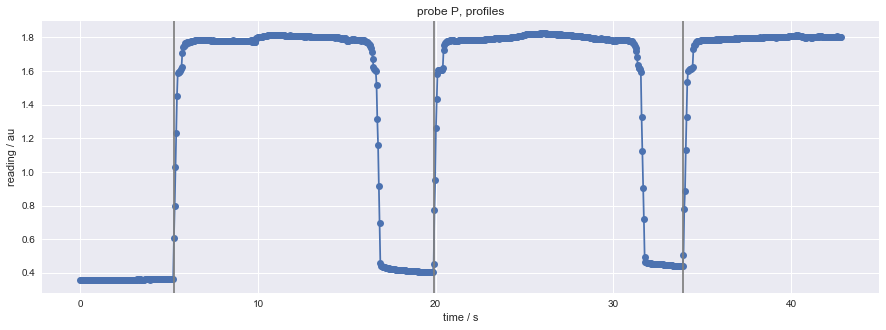

In [15]:
fig, (ax0) = plt.subplots(1,1, figsize=(15,5))

filepath = '../probesBCP_20feb19/test_profiles.mat'

print(filepath)
mat = sio.loadmat(filepath, squeeze_me=True)
ch = mat['ch4']
time = mat['time']
nsamples = mat['nSamples']

ax0.plot(time,ch,'-o')
ax0.axvline(time[123], color='0.5')
ax0.axvline(time[465], color='0.5')
ax0.axvline(time[792], color='0.5')

ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax0.set_title('probe P, profiles')


Text(0.5,1,'probe P, profiles')

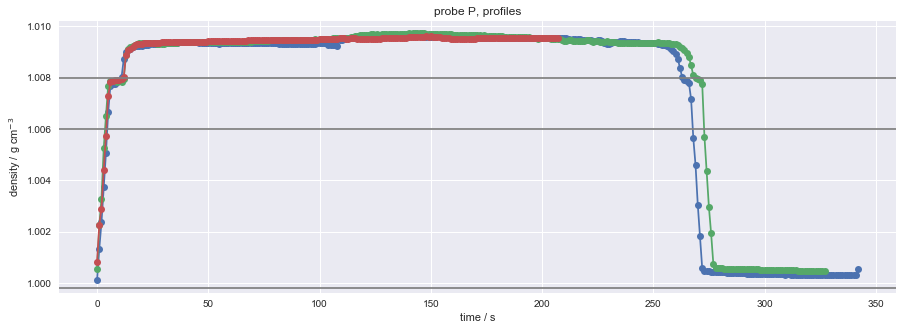

In [16]:
fig, (ax0) = plt.subplots(1,1, figsize=(15,5))

mat = sio.loadmat(filepath, squeeze_me=True)
ch = mat['ch4']
time = mat['time']
nsamples = mat['nSamples']

ax0.plot(densP(ch[122:465]),'-o')
ax0.plot(densP(ch[464:792]),'-o')
ax0.plot(densP(ch[792:]),'-o')

ax0.axhline(1.008, color='0.5')
ax0.axhline(1.006, color='0.5')
ax0.axhline(0.9998, color='0.5')


ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('probe P, profiles')
